<class 'numpy.ndarray'>
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 64
    # data points      = 301
    # variables        = 4
    chi-square         = 12.1915058
    reduced chi-square = 0.04104884
    Akaike info crit   = -957.117612
    Bayesian info crit = -942.289171
[[Variables]]
    amp:    5.10406906 +/- 0.04047202 (0.79%) (init = 10)
    decay:  0.02603625 +/- 4.7179e-04 (1.81%) (init = 0.1)
    shift: -0.08996140 +/- 0.01019792 (11.34%) (init = 0)
    omega:  1.99587370 +/- 0.00332135 (0.17%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(shift, omega) = -0.785
    C(amp, decay)   =  0.584
    C(amp, shift)   = -0.122


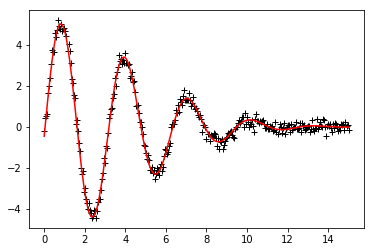

In [77]:
import numpy as np

from lmfit import Minimizer, Parameters, report_fit

# create data to be fitted
x = np.linspace(0, 15, 301)
data = (5. * np.sin(2*x - 0.1) * np.exp(-x*x*0.025) +
        np.random.normal(size=len(x), scale=0.2))

print(type(data))
# define objective function: returns the array to be minimized
def fcn2min(params, x, data):
    """Model a decaying sine wave and subtract data."""
    amp = params['amp']
    shift = params['shift']
    omega = params['omega']
    decay = params['decay']
    model = amp * np.sin(x*omega + shift) * np.exp(-x*x*decay)
    return model - data


# create a set of Parameters
params = Parameters()
params.add('amp', value=10, min=0)
params.add('decay', value=0.1)
params.add('shift', value=0.0, min=-np.pi/2., max=np.pi/2)
params.add('omega', value=3.0)

# do fit, here with leastsq model
minner = Minimizer(fcn2min, params, fcn_args=(x, data))
result = minner.minimize()

# calculate final result
final = data + result.residual

# write error report
report_fit(result)

# try to plot results
import matplotlib.pyplot as plt
plt.plot(x, data, 'k+')
plt.plot(x, final, 'r')
plt.show()

# <end of examples/doc_parameters_basic.py>

[[Model]]
    Model(gaussian2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 48
    # data points      = 101
    # variables        = 3
    chi-square         = 4.03365751
    reduced chi-square = 0.04115977
    Akaike info crit   = -319.265145
    Bayesian info crit = -311.419784
[[Variables]]
    amp:  4.99910839 +/- 0.20037889 (4.01%) (init = 5)
    cen:  0.20932305 +/- 0.04245547 (20.28%) (init = 5)
    wid:  0.91728593 +/- 0.04245547 (4.63%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(amp, wid) =  0.577



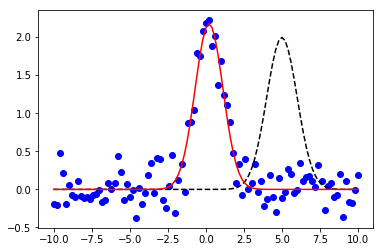

In [88]:
import matplotlib.pyplot as plt
from numpy import exp, loadtxt, pi, sqrt

from lmfit import Model
from numpy import exp, linspace, random
x = linspace(-10, 10, 101)
def gaussian(x, amp, cen, wid):
    return amp * exp(-(x-cen)**2 / wid)


y = gaussian(x, 2.33, 0.21, 1.51) + random.normal(0, 0.2, len(x))

def gaussian2(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (sqrt(2*pi) * wid)) * exp(-(x-cen)**2 / (2*wid**2))


gmodel = Model(gaussian2)
result = gmodel.fit(y, x=x, amp=5, cen=5, wid=1)

print(result.fit_report())

plt.plot(x, y, 'bo')
plt.plot(x, result.init_fit, 'k--')
plt.plot(x, result.best_fit, 'r-')
plt.show()

In [96]:

def absorption(t,ka,kd,Rmax):
    A0  = 2e-6 #fixed for now 
    t0 = 60 
    Rest = Rmax*((ka*A0)/(ka*A0+kd))*(1-np.exp(-(ka*A0+kd)*(t-t0)))
    return Rest

abs_model = Model(absorption)

result = gmodel.fit(y, t=t, kd=0.001, ka=1000,Rmax=0.1)
        


C:\Users\dexte\Anaconda3\lib\site-packages\lmfit\model.py:821: UserWarning: The keyword argument kd does notmatch any arguments of the model function.It will be ignored.
  "It will be ignored.", UserWarning)
C:\Users\dexte\Anaconda3\lib\site-packages\lmfit\model.py:821: UserWarning: The keyword argument ka does notmatch any arguments of the model function.It will be ignored.
  "It will be ignored.", UserWarning)
C:\Users\dexte\Anaconda3\lib\site-packages\lmfit\model.py:821: UserWarning: The keyword argument Rmax does notmatch any arguments of the model function.It will be ignored.
  "It will be ignored.", UserWarning)


ValueError: The input contains nan values

In [94]:
rp = [0.00809905,0.01113594,0.01480747,0.01813849,0.02243566,0.02675926
,0.03100172,0.03573998,0.04048981,0.04502365,0.04900555,0.05303324
,0.05679688,0.06025592,0.06340434,0.06687468,0.06970277,0.07218726
,0.07523895,0.07785905,0.08050573,0.08252485,0.08428901,0.08579441
,0.08750913,0.08825694,0.08934669,0.09089229,0.09204066,0.09300548
,0.09361442,0.09524689,0.09595126,0.09735205,0.0986488,0.09946879
,0.10020775,0.10097607,0.10205985,0.10265303,0.10371597,0.10471913
,0.10519191,0.10575985,0.10649588,0.10695189,0.10758758,0.10756483
,0.10765363,0.10751538,0.1072617,0.10761382,0.10752258,0.1080057
,0.1081759,0.10851443,0.10931449,0.10950294,0.11021964,0.1108123
,0.1122595,0.11295603,0.11317681,0.11386914,0.11470458,0.11473467
,0.1141616,0.11367062,0.11381098,0.11360761,0.11343947,0.11373519
,0.11400567,0.11448669,0.11507043,0.11525928,0.11598867,0.11610026
,0.11659009,0.11738251,0.11819504,0.11812357,0.11822742,0.11856528
,0.11914961,0.11919171,0.11909046,0.11948449,0.11992751,0.12008583
,0.11984076,0.1201386,0.11982375,0.11979405,0.11989499,0.11987136
,0.1198758,0.11982214,0.12008774,0.12041977,0.1202646,0.12042959
,0.12068694,0.12109134,0.12135577,0.12163437,0.12179194,0.1218922
,0.12247828,0.12258954,0.122931,0.12332812,0.12349942,0.12377899
,0.12406921,0.12358541,0.12298476,0.12334933,0.12330374,0.12350065
,0.12331298,0.12318879,0.12279808,0.12279836,0.12240585,0.12248941
,0.12222979,0.12270139,0.12347425,0.12338665,0.12368408,0.12380786
,0.12424485,0.12382816,0.12402463,0.12400398,0.12431484,0.12485778
,0.12475815,0.12462169,0.12434187,0.12441727,0.12416194,0.1241447
,0.12356065,0.12368239,0.12389487,0.12406806,0.12434848,0.12453899
,0.12481896,0.12547251,0.12596473,0.12624663,0.12701451,0.12783891
,0.12784831,0.12798363,0.12783327,0.12786565,0.12824733,0.12801503
,0.12758026,0.1274664,0.12755644,0.12756714,0.12721365,0.12669356
,0.12669517,0.1267398,0.12642991,0.12662908,0.12640985,0.12604067
,0.1261057,0.12663962,0.12641934,0.12649766,0.12594101,0.12582677
,0.1257019,0.12550441,0.12535118,0.12544434,0.12531961,0.12492542
,0.12475961,0.12508944,0.12565204,0.12636839,0.12646327,0.12675753
,0.12685483,0.12691499,0.12712195,0.12762606,0.1275612,0.12739228
,0.12732573,0.12775082,0.12782509,0.12755539,0.12714144,0.12741503
,0.12775737,0.12843165,0.12880808,0.12865891,0.1284747,0.128684
,0.12835847,0.12819055,0.12853197,0.12848734,0.12834901,0.12837296
,0.12853689,0.12912953,0.12985202,0.12959492,0.12891693,0.12836756
,0.12857023,0.1291051,0.12941128,0.12926222,0.12890032,0.12834319
,0.12785764,0.12785672,0.12783045,0.12774768,0.12791761,0.12785546
,0.12764373,0.12775161,0.1287057,0.12883546,0.12929195,0.12890698
,0.12859933,0.12931885,0.1296762,0.12979352,0.12979201,0.12964358
,0.12983366,0.12949294,0.12900561,0.12932926,0.12897792,0.1285269
,0.12797143,0.12839152,0.12826607,0.12849298,0.12810055,0.12793101
,0.12836051,0.1281552,0.12771344,0.12810249,0.12830911,0.12882412
,0.12926832,0.12993716,0.13078528,0.13129162,0.13169077,0.13248555
,0.13185179,0.13213429,0.13215148,0.13273125,0.1322893,0.13197811
,0.13115305,0.13106466,0.13070791,0.1301457,0.12960978,0.12942918
,0.12955065,0.12948203,0.12915744,0.12890572,0.1290528,0.12880152
,0.12847514,0.1288828,0.12816917,0.12870354,0.12933572,0.13009767
,0.1298653,0.13009354,0.13052878,0.13073968,0.13095878,0.13093355
,0.13110615,0.13074628,0.13044235,0.1301316,0.12973848,0.13009589
,0.12971666,0.12924767,0.12932724,0.12989708,0.12997441,0.12993366
,0.13044866,0.13051899,0.12999622,0.13039317,0.13055424,0.13092642
,0.13139224,0.13200811,0.13261755,0.13238686,0.13235982,0.13250611
,0.13303022,0.13332932,0.13289478,0.13340376,0.13408198,0.13422113
,0.13423661,0.13370335,0.13370409,0.13317645,0.13266372,0.13242805
,0.132308,0.13250345,0.1324774,0.13261863,0.1323963,0.13207864
,0.13176932,0.13193415,0.13234681,0.1320753,0.13251169,0.13258112
,0.13258668,0.13220891,0.13214034,0.13157711,0.13098154,0.13030891
,0.12993071,0.13006785,0.1302223,0.12991852,0.13013011,0.13029367
,0.13011726,0.1308567,0.13148534,0.1319781,0.13180662,0.13164709
,0.13195062,0.13181353,0.13164343,0.1316672,0.13185967,0.13204964
,0.13228241,0.13237101,0.13249852,0.13228866,0.13215096,0.13199283
,0.13258146,0.13290307,0.13318046,0.13379642,0.13384474,0.13331624
,0.13285745,0.13251972,0.13226802,0.13196382,0.13218866,0.13265338
,0.13300456,0.13308426,0.13347176,0.13313439,0.13298306,0.13279191
,0.13268223,0.13271345,0.13268921,0.13270497,0.13262518,0.13208911
,0.13184992,0.13185426,0.13166881,0.13148783,0.13145393,0.13180114
,0.13234696,0.13247036,0.13298032,0.13347905,0.13413988,0.13463097
,0.13512141,0.13489992,0.13467677,0.13482151,0.13462981,0.13483528
,0.13454253,0.13393461,0.13404474,0.1344247,0.13434107,0.13405681
,0.13396017,0.13393188,0.13386422,0.13353738,0.13370009,0.13359697
,0.13403708,0.13474423,0.13434287,0.13411764,0.13438424,0.13414935
,0.13390256,0.13383014,0.13341725,0.13318084,0.13383892,0.13425924
,0.13422942,0.13406267,0.1343236,0.13403647,0.13400937,0.1337048
,0.13384635,0.13415448,0.13430669,0.1339572,0.13338738,0.1334403
,0.13303562,0.13320486,0.13312244,0.13290675,0.1329232,0.13274187
,0.13297754,0.13299091,0.1336314,0.13387799,0.13403733,0.13397753
,0.13394622,0.13443111,0.13429239,0.13465312,0.1343824,0.13447808
,0.13458296,0.13466827,0.13486733,0.13558866,0.13540466,0.13476831
,0.13462107,0.13435373,0.13434137,0.134537,0.13496504,0.13431675
,0.13402371,0.13381099,0.13320123,0.13368788,0.13339949,0.13393796
,0.1339208,0.13444822,0.13450265,0.13476502,0.13546931,0.13530203
,0.13498633,0.13453687,0.13430232,0.13424945,0.13382112,0.13375038
,0.13374742,0.13334152,0.13287054,0.13282545,0.13236603,0.13228462
,0.13224576,0.13234572,0.13201804,0.13201568,0.13228479,0.13266333
,0.13290984,0.13263554,0.13262393,0.1331218,0.13318581,0.13349523
,0.13404376,0.13443688,0.13480091,0.13478285,0.13440277,0.13478935
,0.13488089,0.13450601,0.13483571,0.13488774,0.13459265,0.13467917
,0.13491435,0.13469373,0.13436307,0.13459398,0.13490211,0.13540514
,0.13504026,0.13469737,0.13484755,0.13457659,0.134777,0.13490246
,0.13473371,0.13521143,0.13528081,0.13500837,0.13544665,0.1360819
,0.13589979,0.13597023,0.13589631,0.13555189,0.13547914,0.13563125
,0.13533397,0.13475869,0.13402739,0.13327921,0.13359178,0.13349995
,0.13416997,0.13380856,0.13335858,0.13366458,0.13326355,0.13363791
,0.13388391,0.13462682,0.13468748,0.1351379,0.13515059,0.13545826
,0.1361774,0.1363939,0.13628678,0.13646817,0.13652095,0.13658752
,0.13725769,0.13709893,0.1369298,0.13643597,0.13665637,0.13638214
,0.1360328,0.13590178]
tp = [60.,60.2,60.4,60.6,60.8,61.,61.2,61.4,61.6,61.8,62.,62.2
,62.4,62.6,62.8,63.,63.2,63.4,63.6,63.8,64.,64.2,64.4,64.6
,64.8,65.,65.2,65.4,65.6,65.8,66.,66.2,66.4,66.6,66.8,67.
,67.2,67.4,67.6,67.8,68.,68.2,68.4,68.6,68.8,69.,69.2,69.4
,69.6,69.8,70.,70.2,70.4,70.6,70.8,71.,71.2,71.4,71.6,71.8
,72.,72.2,72.4,72.6,72.8,73.,73.2,73.4,73.6,73.8,74.,74.2
,74.4,74.6,74.8,75.,75.2,75.4,75.6,75.8,76.,76.2,76.4,76.6
,76.8,77.,77.2,77.4,77.6,77.8,78.,78.2,78.4,78.6,78.8,79.
,79.2,79.4,79.6,79.8,80.,80.2,80.4,80.6,80.8,81.,81.2,81.4
,81.6,81.8,82.,82.2,82.4,82.6,82.8,83.,83.2,83.4,83.6,83.8
,84.,84.2,84.4,84.6,84.8,85.,85.2,85.4,85.6,85.8,86.,86.2
,86.4,86.6,86.8,87.,87.2,87.4,87.6,87.8,88.,88.2,88.4,88.6
,88.8,89.,89.2,89.4,89.6,89.8,90.,90.2,90.4,90.6,90.8,91.
,91.2,91.4,91.6,91.8,92.,92.2,92.4,92.6,92.8,93.,93.2,93.4
,93.6,93.8,94.,94.2,94.4,94.6,94.8,95.,95.2,95.4,95.6,95.8
,96.,96.2,96.4,96.6,96.8,97.,97.2,97.4,97.6,97.8,98.,98.2
,98.4,98.6,98.8,99.,99.2,99.4,99.6,99.8,100.,100.2,100.4,100.6
,100.8,101.,101.2,101.4,101.6,101.8,102.,102.2,102.4,102.6,102.8,103.
,103.2,103.4,103.6,103.8,104.,104.2,104.4,104.6,104.8,105.,105.2,105.4
,105.6,105.8,106.,106.2,106.4,106.6,106.8,107.,107.2,107.4,107.6,107.8
,108.,108.2,108.4,108.6,108.8,109.,109.2,109.4,109.6,109.8,110.,110.2
,110.4,110.6,110.8,111.,111.2,111.4,111.6,111.8,112.,112.2,112.4,112.6
,112.8,113.,113.2,113.4,113.6,113.8,114.,114.2,114.4,114.6,114.8,115.
,115.2,115.4,115.6,115.8,116.,116.2,116.4,116.6,116.8,117.,117.2,117.4
,117.6,117.8,118.,118.2,118.4,118.6,118.8,119.,119.2,119.4,119.6,119.8
,120.,120.2,120.4,120.6,120.8,121.,121.2,121.4,121.6,121.8,122.,122.2
,122.4,122.6,122.8,123.,123.2,123.4,123.6,123.8,124.,124.2,124.4,124.6
,124.8,125.,125.2,125.4,125.6,125.8,126.,126.2,126.4,126.6,126.8,127.
,127.2,127.4,127.6,127.8,128.,128.2,128.4,128.6,128.8,129.,129.2,129.4
,129.6,129.8,130.,130.2,130.4,130.6,130.8,131.,131.2,131.4,131.6,131.8
,132.,132.2,132.4,132.6,132.8,133.,133.2,133.4,133.6,133.8,134.,134.2
,134.4,134.6,134.8,135.,135.2,135.4,135.6,135.8,136.,136.2,136.4,136.6
,136.8,137.,137.2,137.4,137.6,137.8,138.,138.2,138.4,138.6,138.8,139.
,139.2,139.4,139.6,139.8,140.,140.2,140.4,140.6,140.8,141.,141.2,141.4
,141.6,141.8,142.,142.2,142.4,142.6,142.8,143.,143.2,143.4,143.6,143.8
,144.,144.2,144.4,144.6,144.8,145.,145.2,145.4,145.6,145.8,146.,146.2
,146.4,146.6,146.8,147.,147.2,147.4,147.6,147.8,148.,148.2,148.4,148.6
,148.8,149.,149.2,149.4,149.6,149.8,150.,150.2,150.4,150.6,150.8,151.
,151.2,151.4,151.6,151.8,152.,152.2,152.4,152.6,152.8,153.,153.2,153.4
,153.6,153.8,154.,154.2,154.4,154.6,154.8,155.,155.2,155.4,155.6,155.8
,156.,156.2,156.4,156.6,156.8,157.,157.2,157.4,157.6,157.8,158.,158.2
,158.4,158.6,158.8,159.,159.2,159.4,159.6,159.8,160.,160.2,160.4,160.6
,160.8,161.,161.2,161.4,161.6,161.8,162.,162.2,162.4,162.6,162.8,163.
,163.2,163.4,163.6,163.8,164.,164.2,164.4,164.6,164.8,165.,165.2,165.4
,165.6,165.8,166.,166.2,166.4,166.6,166.8,167.,167.2,167.4,167.6,167.8
,168.,168.2,168.4,168.6,168.8,169.,169.2,169.4,169.6,169.8,170.,170.2
,170.4,170.6,170.8,171.,171.2,171.4,171.6,171.8,172.,172.2,172.4,172.6
,172.8,173.,173.2,173.4,173.6,173.8,174.,174.2,174.4,174.6,174.8,175.
,175.2,175.4,175.6,175.8,176.,176.2,176.4,176.6,176.8,177.,177.2,177.4
,177.6,177.8]

In [103]:

def absorption(t,ka,kd,Rmax):
    A0  = 2e-6 #fixed for now 
    t0 = 60 
    Rest = Rmax*((ka*A0)/(ka*A0+kd))*(1-np.exp(-(ka*A0+kd)*(t-t0)))
    return Rest

abs_model = Model(absorption)
print(abs_model.param_names)
result = gmodel.fit(rp,t=tp, ka=0.001, kd=1000,Rmax=0.1)
        

['ka', 'kd', 'Rmax']


C:\Users\dexte\Anaconda3\lib\site-packages\lmfit\model.py:821: UserWarning: The keyword argument t does notmatch any arguments of the model function.It will be ignored.
  "It will be ignored.", UserWarning)
C:\Users\dexte\Anaconda3\lib\site-packages\lmfit\model.py:821: UserWarning: The keyword argument ka does notmatch any arguments of the model function.It will be ignored.
  "It will be ignored.", UserWarning)
C:\Users\dexte\Anaconda3\lib\site-packages\lmfit\model.py:821: UserWarning: The keyword argument kd does notmatch any arguments of the model function.It will be ignored.
  "It will be ignored.", UserWarning)
C:\Users\dexte\Anaconda3\lib\site-packages\lmfit\model.py:821: UserWarning: The keyword argument Rmax does notmatch any arguments of the model function.It will be ignored.
  "It will be ignored.", UserWarning)


KeyError: 'x'

t shape is  (590,)
(590,)
(590,)
(590,)
(590,)
(590,)
(590,)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 590
    # variables        = 3
    chi-square         = 9.39642341
    reduced chi-square = 0.01600754
    Akaike info crit   = -2436.47811
    Bayesian info crit = -2423.33774
[[Variables]]
    kd:    93200.0000 (init = 93200)
    ka:    0.03450000 (init = 0.0345)
    Rmax:  0.15510000 (init = 0.1551)


ValueError: x and y must have same first dimension, but have shapes (301,) and (590,)

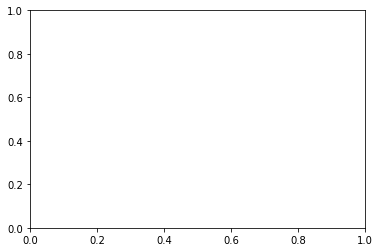

In [50]:
import numpy as np

from lmfit import Minimizer, Parameters, report_fit

# create data to be fitted
t = (np.array(tp))
print("t shape is ", t.shape)
data =  (np.array(rp))
def fcn2min(params2, t, data,A0,t0,params):
    """Model a decaying sine wave and subtract data."""
    kd = params2["kd"]
    ka = params2["ka"]
    Rmax = params2["Rmax"]
    Rest = Rmax*((ka*A0)/(ka*A0+kd))*(1-np.exp(-(ka*A0+kd)*t))
    print(Rest.shape)
    return Rest - data





# define objective function: returns the array to be minimized
#def fcn2min(params,t,Rdata,A0,t0):
#    kd = params["kd"]
#    ka = params["ka"]
#    Rmax = params["Rmax"]
#    Rest = ka-kd
    #Rest = Rmax*((ka*A0)/(ka*A0+kd))*(1-np.exp(-(ka*A0+kd)*t))
    
    
    
    
    
# create a set of Parameters
params2 = Parameters()
kon = 9.32e4#8.6536e4
kdis = 3.45e-2#6.124e-3
Rmaxf = 0.1551 #0.1306

A0 = 2e-06 
t0 = 60 

params2.add("kd",value=kon,min=0.000001)
params2.add("ka",value=kdis,min=0.00001)
params2.add("Rmax",value=Rmaxf) 

# do fit, here with leastsq model
minner = Minimizer(fcn2min, params2, fcn_args=(t, data,A0,t0,params))
result = minner.minimize()

# calculate final result
final = data + result.residual

# write error report
report_fit(result)

# try to plot results
import matplotlib.pyplot as plt
plt.plot(x, data, 'k+')
plt.plot(x, final, 'r')
plt.show()


In [118]:
import matplotlib.pyplot as plt 
import numpy as np   
from lmfit import Model 

t = np.linspace(0,10,10)
c = 0.3
y = np.exp(c*t)

#plt.plot(t,y,'o')
def expFunc(t2,c):
    return np.exp(c*t2)
eModel = Model(expFunc)
result = eModel.fit(y,t2=t,c=1)
#plt.plot(t,result.best_fit,'k--')
#print(result.fit_report())

[[Model]]
    Model(absorption)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 48
    # data points      = 590
    # variables        = 3
    chi-square         = 0.01023730
    reduced chi-square = 1.7440e-05
    Akaike info crit   = -6461.48543
    Bayesian info crit = -6448.34506
[[Variables]]
    ka:    91468.8774 +/- 2.3996e+09 (2623422.05%) (init = 53200)
    kd:    0.01054504 +/- 4799.22915 (45511720.38%) (init = 0.0345)
    Rmax:  0.13807361 +/- 3626.87154 (2626766.62%) (init = 0.1551)
    A0:    2e-06 (fixed)
    t0:    60 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(kd, Rmax) =  1.000
    C(ka, Rmax) = -1.000
    C(ka, kd)   = -1.000



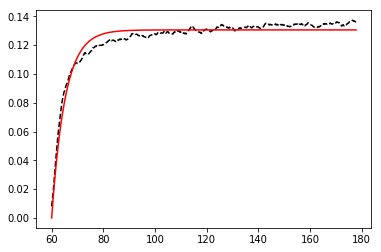

In [142]:
import matplotlib.pyplot as plt 
import numpy as np   
from lmfit import Model, Parameter

plt.plot(tp,rp,'--k')


def absorption(t,ka,kd,Rmax,A0,t0):
    #A0  = 2e-6 #fixed for now 
    #t0 = 60 
    Rest = Rmax*((ka*A0)/(ka*A0+kd))*(1-np.exp(-(ka*A0+kd)*(t-t0)))
    return Rest
aModel = Model(absorption)
kon = 5.32e4#8.6536e4
kdis = 3.45e-2#6.124e-3
Rmaxf = 0.1551 #0.1306

params = aModel.make_params()
params["kd"] = Parameter(name="kd",value=kdis,min=0)
params["ka"] = Parameter(name="ka",value=kon,min=0)
params["Rmax"] = Parameter(name="Rmax",value=Rmaxf,min=0)
params["A0"] = Parameter(name="A0",value=2e-6,vary=False) 
params["t0"] = Parameter(name="t0",value=60,vary=False) 



result = aModel.fit(rp,params,t=tp)

plt.plot(tp,result.best_fit,'r')
print(result.fit_report())